In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmlb import fetch_data, classification_dataset_names
adult_data = fetch_data('adult')
print(len(classification_dataset_names))
print(adult_data.describe())

166
                age     workclass        fnlwgt     education  education-num  \
count  48842.000000  48842.000000  4.884200e+04  48842.000000   48842.000000   
mean      38.643585      3.870439  1.896641e+05     10.288420      10.078089   
std       13.710510      1.464234  1.056040e+05      3.874492       2.570973   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.175505e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.781445e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.376420e+05     12.000000      12.000000   
max       90.000000      8.000000  1.490400e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    48842.000000  48842.000000  48842.000000  48842.000000  48842.000000   
mean         2.618750      6.577700      1.443287      3.668052      0.668482   
std          1.507703      4.230

Text(0,0.5,'Test Accuracy')

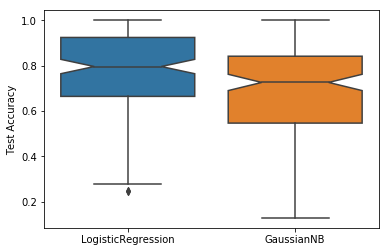

In [3]:
logit_test_scores = []
gnb_test_scores = []

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(classification_dataset, return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y)

    logit = LogisticRegression()
    gnb = GaussianNB()

    logit.fit(train_X, train_y)
    gnb.fit(train_X, train_y)
    logit_test_scores.append(logit.score(test_X, test_y))
    gnb_test_scores.append(gnb.score(test_X, test_y))

sb.boxplot(data=[logit_test_scores, gnb_test_scores], notch=True)
plt.xticks([0, 1], ['LogisticRegression', 'GaussianNB'])
plt.ylabel('Test Accuracy')
## show the boxplot based on log_Regression & GaussNB

## more to do normalized

In [14]:
###save data 
logit_gnb = pd.DataFrame(data = [logit_test_scores, gnb_test_scores])
logit_gnb.to_csv('logit_gnb.csv', encoding = 'utf-8', index = False)


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.4825,0.5025,0.4725,0.4925,0.46,0.4900,0.963696,0.996700,0.790926,0.953854,...,0.954128,0.516129,0.8680,0.8728,0.965035,0.5775,0.535131,0.911111,0.848361,0.491892
1,0.4775,0.5125,0.4450,0.4650,0.45,0.4725,0.501650,0.514851,0.796004,0.921944,...,0.944954,0.661290,0.8128,0.8032,0.951049,0.5525,0.460784,0.977778,0.848361,0.218919


In [23]:
input_logit_gnb = pd.read_csv('logit_gnb.csv', encoding = 'utf-8')
input_logit_gnb.describe()

,0
count,166.000000
mean,0.986923
std,0.048121
min,0.565000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
#take adult data as an example!!
X,y = fetch_data('adult',return_X_y = True) 
print(X.shape)
y0 = pd.DataFrame(y)
print(y0.describe())

train_X, test_X, train_y, test_y = train_test_split(X, y)

(48842, 14)
                  0
count  48842.000000
mean       0.760718
std        0.426649
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


In [17]:
## for adult data check 3 methods results

from sklearn.ensemble import ExtraTreesClassifier

#ML part
logit = LogisticRegression()
gnb = GaussianNB()
forest = ExtraTreesClassifier()


logit.fit(train_X, train_y)
gnb.fit(train_X, train_y)
forest.fit(train_X,train_y)
print(logit.score(test_X, test_y))
print(gnb.score(test_X, test_y))
print(forest.score(test_X,test_y))


0.790189173695848
0.7933830153140611
0.8348210629760052


In [18]:
## run a thorough result on Extreme Tree and comparing 

from sklearn.ensemble import ExtraTreesClassifier

forest_test_scores = []

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(classification_dataset, return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    
    forest = ExtraTreesClassifier()
    
    forest.fit(X, y)
    
    forest_test_scores.append(forest.score(test_X,test_y))
    
pd.forest_test_scores = pd.DataFrame(data = forest_test_scores)
pd.forest_test_scores.describe()

,0
count,166.000000
mean,0.986923
std,0.048121
min,0.565000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Text(0,0.5,'Test Accuracy')

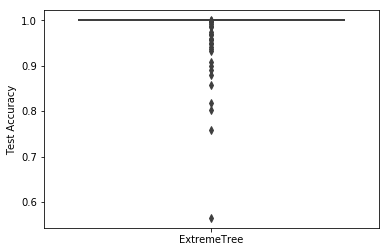

In [20]:
sb.boxplot(data=[forest_test_scores], notch=True)
plt.xticks([0], ['ExtremeTree'])
plt.ylabel('Test Accuracy')

In [25]:
extra_forest = pd.DataFrame(data = forest_test_scores)
extra_forest.to_csv('extra_forest.csv', encoding = 'utf-8', index = False)

In [27]:
input2 = pd.read_csv('extra_forest.csv', encoding = 'utf-8')
input2.describe()

,0
count,166.000000
mean,0.986923
std,0.048121
min,0.565000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
#test one catboost
#take adult data as an example!!
X,y = fetch_data('adult',return_X_y = True) 
print(X.shape)
y0 = pd.DataFrame(y)
print(y0.describe())

train_X, test_X, train_y, test_y = train_test_split(X, y)
from catboost import CatBoostClassifier, Pool

catboost = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')
catboost.fit(X,y)
catboost.score(test_X,test_y)



(48842, 14)
                  0
count  48842.000000
mean       0.760718
std        0.426649
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
0:	learn: 0.4191731	total: 88.1ms	remaining: 88.1ms
1:	learn: 0.3651552	total: 112ms	remaining: 0us


0.8405535992138236

In [35]:
##result run in another file
input3 = pd.read_csv('catboost.csv', encoding = 'utf-8')
input3.describe()

,0
count,166.000000
mean,0.716796
std,0.201963
min,0.008777
25%,0.595312
50%,0.758201
75%,0.863367
max,1.000000


In [4]:
import lightgbm as lgb 
import pickle 

In [8]:
X,y = fetch_data('adult',return_X_y = True) 
print(X.shape)
y0 = pd.DataFrame(y)
print(y0.describe())

train_X, test_X, train_y, test_y = train_test_split(X, y)

(48842, 14)
                  0
count  48842.000000
mean       0.760718
std        0.426649
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


In [29]:
clf = lgb.LGBMClassifier(n_estimators=400)
clf.fit(train_X,train_y)
clf.score(test_X,test_y)

0.8702808942756531

In [31]:
lgbm_test_scores = []

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(classification_dataset, return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    
    clf = lgb.LGBMClassifier(n_estimators=400)
    
    clf.fit(X, y)
    
    lgbm_test_scores.append(clf.score(test_X,test_y))
    
pd.lgbm_test_scores = pd.DataFrame(data = lgbm_test_scores)
pd.lgbm_test_scores.describe()

,0
count,166.000000
mean,0.959600
std,0.095244
min,0.490000
25%,0.978333
50%,1.000000
75%,1.000000
max,1.000000


Text(0,0.5,'Test Accuracy')

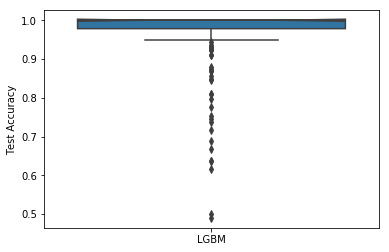

In [32]:
sb.boxplot(data=[lgbm_test_scores], notch=True)
plt.xticks([0], ['LGBM'])
plt.ylabel('Test Accuracy')

In [8]:
size_set = np.array([[0.6,0.2,0.2],[0.6,0.1,0.1],[0.5,0.2,0.2],[0.5,0.2,0.2]])

In [9]:
size_set

array([[0.6, 0.2, 0.2],
       [0.6, 0.1, 0.1],
       [0.5, 0.2, 0.2],
       [0.5, 0.2, 0.2]])